In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
# define parameters for NN
img_rows, img_cols = 224, 224
batch_size = 128
num_classes = 2
epochs = 10
input_shape = (img_rows, img_cols, 3)

In [ ]:
!git clone "https://github.com/RA2112704010015/Car-vs-bike.git"

fatal: destination path 'Car-vs-bike' already exists and is not an empty directory.


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/Car-vs-bike/Dataset/Train',
                                                 target_size = (img_rows, img_cols),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 3200 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/Car-vs-bike/Dataset/Test',
                                            target_size = (img_rows, img_cols),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 800 images belonging to 2 classes.


In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,731,009 (94.34 MB)

 Trainable params: 24,731,009 (94.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4871 - loss: 0.6934

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.4871 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.5029 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.5158 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.5176 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - accuracy: 0.4953 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.5064 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.4855 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 322s 3s/step - accuracy: 0.4885 - loss: 0.6933 - val_accuracy: 0.500

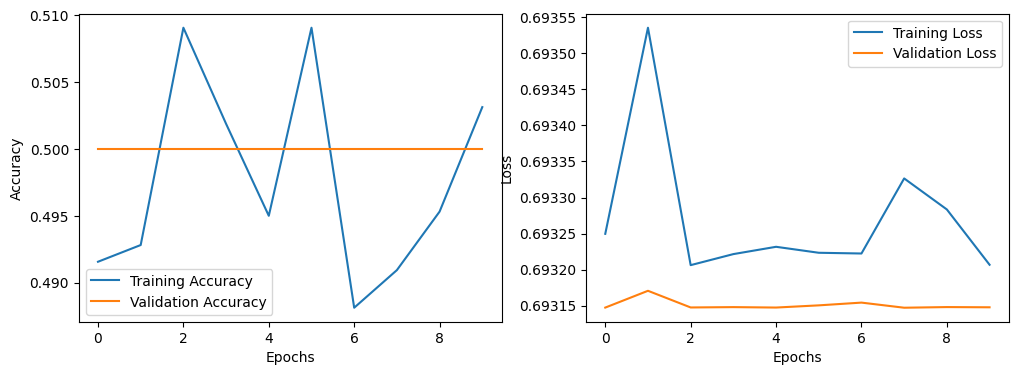

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/Car-vs-bike/Dataset/Valdation/car.jpeg',
                            target_size = (224, 224))

test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Bike'
else:
  prediction = 'car'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
car
